In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [31]:
df = pd.read_csv('/content/Titanic-Dataset.csv',usecols=['Age','Fare'])
df

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [32]:
df.isnull().sum()

,0
Age,177
Fare,0


In [33]:
df.shape

(891, 2)

In [34]:
# using random sample technique
# fill null values in age column

def fun(df,var):
  df[var+'_replaced'] = df[var].copy()
  s = df[var].dropna().sample(df[var].isnull().sum(),random_state=42)
  s.index = df[df[var].isnull()].index
  df.loc[df[var].isnull() , 'Age_replaced'] = s

In [35]:
fun(df,'Age')

In [36]:
df

,Age,Fare,Age_replaced
0,22.0,7.2500,22.0
1,38.0,71.2833,38.0
2,26.0,7.9250,26.0
3,35.0,53.1000,35.0
4,35.0,8.0500,35.0
...,...,...,...
886,27.0,13.0000,27.0
887,19.0,30.0000,19.0
888,NaN,23.4500,52.0
889,26.0,30.0000,26.0


In [37]:
df = df.drop(['Age'],axis=1)
df

,Fare,Age_replaced
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0
...,...,...
886,13.0000,27.0
887,30.0000,19.0
888,23.4500,52.0
889,30.0000,26.0


In [38]:
df.isnull().sum()

,0
Fare,0
Age_replaced,0


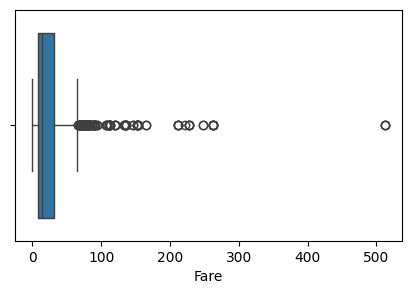

In [39]:
plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare'])
plt.show()

**How to solve the outliers**


- `trimming`
- `capping with mean and std`
- `capping with 5th and 9th quantile`

In [46]:
# Trimming

def trim(df,var):
  iqr = df[var].quantile(0.75) - df[var].quantile(0.25)
  upper_limit = df[var].quantile(0.75) + (1.5 * iqr)
  lower_limit = df[var].quantile(0.25) - (1.5 * iqr)
  return upper_limit,lower_limit



up_l , low_l = trim(df,'Fare')
print(f'Upper Limit : {up_l}')
print(f'Lower Limit : {low_l}')

Upper Limit : 65.6344
Lower Limit : -26.724


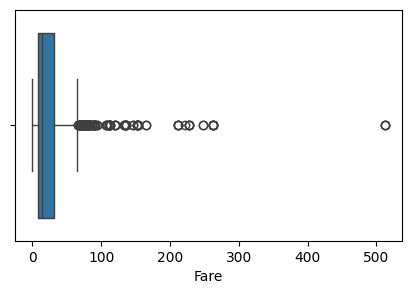

In [47]:
# Before Applying Triming concept
plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare'])
plt.show()

In [48]:
df['Fare_trimming'] = np.where(df['Fare'] > up_l,up_l,
         np.where(df['Fare'] < low_l , low_l,df['Fare']))

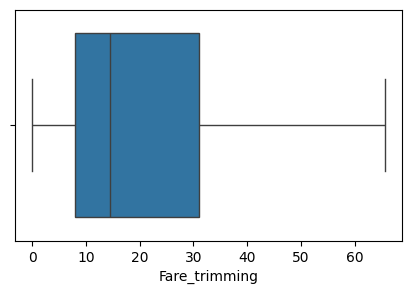

In [49]:
# After Applying Triming concept
plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare_trimming'])
plt.show()

**Capping with mean and std**

In [50]:
# Capping with mean and std

def cap_(df,var):
  upper_limit = df[var].mean() + 3 * df[var].std()
  lower_limit = df[var].mean() - 3 * df[var].std()
  return upper_limit,lower_limit



up_l , low_l = cap_(df,'Fare')
print(f'Upper Limit : {up_l}')
print(f'Lower Limit : {low_l}')

Upper Limit : 181.28449376011736
Lower Limit : -116.87607782296807


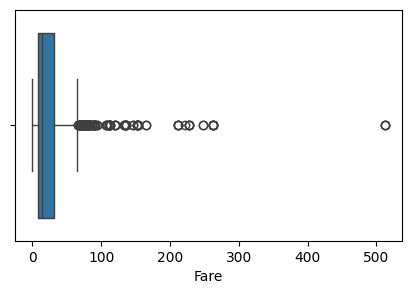

In [51]:
# Before Applying capping concept
plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare'])
plt.show()

In [52]:
df['Fare_mean_Std'] = np.where(df['Fare'] > up_l,up_l,
         np.where(df['Fare'] < low_l , low_l,df['Fare']))

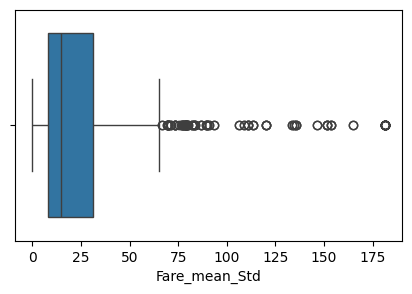

In [53]:
# After Applying Triming concept
plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare_mean_Std'])
plt.show()

**capping with 5th and 9th quantile**

In [54]:
# Capping with 5th and 95th quantile

def cap_(df,var):
  upper_limit = df[var].quantile(0.95)
  lower_limit = df[var].quantile(0.05)
  return upper_limit,lower_limit



up_l , low_l = cap_(df,'Fare')
print(f'Upper Limit : {up_l}')
print(f'Lower Limit : {low_l}')

Upper Limit : 112.07915
Lower Limit : 7.225


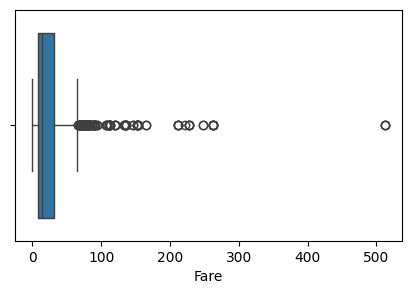

In [55]:
# Before Applying capping concept
plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare'])
plt.show()

In [56]:
df['Fare_5th_95th'] = np.where(df['Fare'] > up_l,up_l,
         np.where(df['Fare'] < low_l , low_l,df['Fare']))

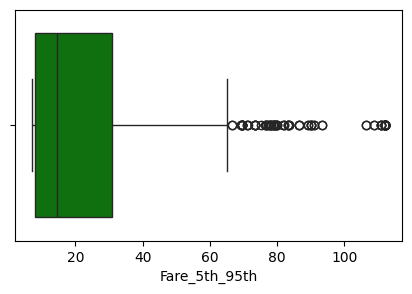

In [58]:
# After Applying cap concept
plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare_5th_95th'],color='g')
plt.show()